# Unsupervised learning


In [5]:
%%javascript
IPython.notebook.config.update({
  "load_extensions": {"calico-spell-check":true,
                      "calico-document-tools":true,
                      "calico-cell-tools":true
                     }
})



<IPython.core.display.Javascript object>

In supervised machine learning, the task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$

In contrast, in unsupervised learning, the true values, $y_i$, are not known. In this case we cannot traine a model to predict anything, but instead try to expolore the X-matrix data itself. Unsupervised methods do predict something, but we do not know what it is before the function is targeted to the data.

$$
   ? = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$

Unsupervised methods are also often used for reducing the dimensions of the data by removing redundancy, and they work also in feature selection.

## Dimensionality reductions

The dimensionality of the design matrix, $X$, shown above is the number of features, $p$.

Dimensionality reductions means transforming data from a high dimensional representation to the lower dimensional representation, still retaining usefull properties of the original data. When dimensionality reduction is applied to matrix $X^{n\times p}$ the resulting reduced matrix will have as many samples as the original matrix, but the number of features $p$ is reduced.

### Principal Component Analysis (PCA)

PCA is one of the most well known dimensionality reduction methods. It transforms the set of observations with possibly correlated variables (=features) into a set of values of linearly uncorrelated variables, called principal components.

PCA transformation is defined in such a way that the first principal component has the largest possible variance and the rest of the components are ordered according to their variances in descending order.

PCA can be used as a dimensionality reduction method by removing some of the least important variables, and keeping the first most important.

This is very convenient, since the variables in high-dimensional problems are often correlated. The high dimensionality and co-variance between the features makes many statistical methods inapplicable. Eliminating the covariance and reducing the dimensionality makes many methods working better.

PCA was invented in 1901 by Karl Pearson, as an analogue of
the principal axis theorem in mechanics; it was later
independently developed (and named) by Harold Hotelling in
the 1930s.Depending on the field of application, it is also named thediscrete Karhunen Loeve transform (KLT) in signal processing,
the Hotelling transform in multivariate quality control, singular
value decomposition (SVD), and eigenvalue decomposition
(EVD).

[1] I. T. Jolliffe, “Discarding Variables in a Principal Component Analysis. Ii: Real Data,” Journal of the Royal Statistical Society: Series C (Applied Statistics), vol. 22, no. 1, pp. 21–31, 1973, doi: 10.2307/2346300.
[2] Q. Guo, W. Wu, D. L. Massart, C. Boucon, and S. de Jong, “Feature selection in principal component analysis of analytical data,” Chemometrics and Intelligent Laboratory Systems, vol. 61, no. 1, pp. 123–132, Feb. 2002, doi: 10.1016/S0169-7439(01)00203-9.
[3] I. T. Jolliffe, “Discarding Variables in a Principal Component Analysis. I: Artificial Data,” Journal of the Royal Statistical Society: Series C (Applied Statistics), vol. 21, no. 2, pp. 160–173, 1972, doi: 10.2307/2346488.
[4] C. M. Bishop, “Pattern recognition and machine learning,” CERN Document Server, 2006. https://cds.cern.ch/record/998831 (accessed Oct. 02, 2020).


The mean values are different, but are the differences significant. Perhaps studying the overall variation or noise by means of standard deviation would help.

In [6]:
iris.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


It looks like the differences of for example petal_lengths seem to be bigger than the standard deviation. It could be feasible to use it for species recognition.

### Visual analysis of mean and distribution using boxplot

The boxplot displays the median value (the red lines inside the boxes) and distribution as quartiles (the height of the boxes, and lengths of the whiskers) graphically. The box extends from *quartile* Q1 below to quartile Q3 above the median. The length of the whiskers is 1.5 times the *inter quartile range* (IQR) from the box edge, where IQR=Q3-Q1. The values outside of whiskers are interpreted as *outliers*, and they are plotted as circles.

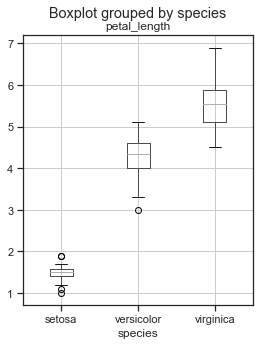

In [11]:
iris.boxplot('petal_length', by='species', figsize=(4,5));

The boxplot shows that Setosa can be separated from Versicolor and Virginica with no confusion, but there is some overlap between Versicolor and Virginica.

### Applying an external function to data

Sometimes it is necessary to apply also such functions to the data, which are not part of the dataframe. It can be accomplished by using the apply-method as follows. Here the median-function from the NumPy-libary is used. You can also apply your own function to the data.

In [16]:
iris.groupby('species').petal_length.apply(np.median)

species
setosa        1.50
versicolor    4.35
virginica     5.55
Name: petal_length, dtype: float64

In [17]:
x=np.array((1,5,3,6,8,4,3,6,2))
np.sort(x)
x

array([1, 5, 3, 6, 8, 4, 3, 6, 2])

In [18]:
def fullRange(x):
    """A function for studying the full range of the vector"""
    sortedx=np.sort(x)
    return (sortedx[-1] - sortedx[0])

iris.groupby('species').petal_length.apply(fullRange)

species
setosa        0.9
versicolor    2.1
virginica     2.4
Name: petal_length, dtype: float64

## Hypothesis testing

Let's formally study if the petal lengts are significantly different or not by forming two hypothesis:

1. The distribution of petal lengths of Setosa species is different than the distribution of petal lengts of other species
1. Let's also assume that the distribution of petal lengts of Versicolor is siginificantly different than that of Virginica

The standard test for these hypothesis is the [Student's T-test](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/). 

But the T-test can only be used if the variables are normally distributed. Let's test that first.

### Testing if distribution of the variables is normal

Read more about normality testing methods from [Statistics howto](https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/)

Most often used normality test is the D’Agostino-Pearson Test. It can be taken into use by importing the `normaltest` function from the stats module of the Scientific Python package.



In [19]:
from scipy.stats import normaltest

normaltest

# Run normality test, and print the output
print(normaltest(iris.petal_length))

# Interpretation, we discard the hypothesis of normal distribution
# if it's probability (the p-value) is less than 95%
alpha=0.05
statistis, pvalue=normaltest(iris.petal_length)
if pvalue<alpha:
    print("Data is normal distributed")
else:
    print("Data is not normal distributed")

NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)
Data is normal distributed


But we were supposed to test this for all species separately

In [48]:
# 
# It can be done by grouping the data by species, selecting the petal_lenght
# and applying the normal test to all species separately
results=iris.groupby('species').petal_length.apply(normaltest)
print(results)
if (results[0][1] < alpha):     print("Petal length of Setosa is normally distributed")
if (results[1][1] < alpha):     print("Petal length of Versicolor is normally distributed")
if (results[2][1] < alpha):     print("Petal length of Virginica is normally distributed")

species
setosa        (2.236973547672174, 0.32677390349997293)
versicolor     (3.3182862415011867, 0.190301976072032)
virginica     (2.6991800572037943, 0.2593465635270746)
Name: petal_length, dtype: object


The data does not justify us to safely conclude that the data would be normally distributed! The visual inspection of the distribution shown in the Seaborn pairplot support this result.

## Test the similarity of petal_length distributions

The most often used method for hypothesis testing, is the Student's T-test, which is also in the stats module of Scientific Python package.

(*We try to use T-test even though we do not have the autorization, because the variable is not normally distributed! The consequence is that whatever the result is, it may not be reliable*)

T-Test supports four different confiurations. Read the documentation and select the correct configuration. The selection is quite straightforward.

1. Two-sided test for the null hypothesis that two independent samples have identical average (expected) values. Example: `p=ttest_ind(a,b)`
1. Two-sided test for the null hypothesis that the expected value of a sample of independent observations `a` is equal to the given population mean, `popmean`. Example: `p=ttest_1samp(a, popmean)`
1. Two-sided test for the null hypothesis that two related or repeated or paired samples have identical average (expected) values. Example: `p=ttest_rel(a,b)`
1. Two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. Example: `ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)`

Here all tests are two sided, meaning that we do not have any a-priori knowlwdge that one would be bigger than another.

The hypotheses that the two distributions are different are accepted if the probability of getting into that conclusion by chance, $\alpha$ is smaller than 5%: 

(p-value$~<\alpha$, when $\alpha=0.05$).

In [19]:
# T-test of two independent data sets
from scipy.stats import ttest_ind 

alpha=0.05

# Test if the petal_lengths of the Setosas are different than the petal_lengths other flowers
test=ttest_ind(iris[iris.species=='setosa'].petal_length, iris[iris.species!='setosa'].petal_length)
print(test)
if test.pvalue < alpha:
    print("The petal_length of setosa are statistically different "
          +"than the petal_length of other flowers. p=%4.3f" % test.pvalue)
else:
    print("The petal_length of setosa are not statistically different "
          +"than the petal_length of other flowers: p=%4.3f" % test.pvalue)
    
# Test if the petal_lengths of Versicolor and Virginia are different
test=ttest_ind(iris[iris.species=='versicolor'].petal_length, iris[iris.species=='virginica'].petal_length)
if test.pvalue < alpha:
    print("The petal_lengths of Versicolor and Virginica are statistically different "
          +": p=%4.2f" % test.pvalue)
else:
    print("The petal_lengths of Versicolor and Virginica are not statistically different "
          +": p=%4.2f" % test.pvalue)

Ttest_indResult(statistic=-29.130840211367364, pvalue=3.6233785751774946e-63)
The petal_length of setosa are statistically different than the petal_length of other flowers. p=0.000
The petal_lengths of Versicolor and Virginica are statistically different : p=0.00


## Non-parametric testing
Because the data is not normally distributed, we are not allowed to use the T-test, but we need to use non-parametric tests instead. One often used is the [Mann-Whitney rank-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test). Because this test does not assume anything about the shape of the distributions, it usually needs larger sample size to get reliable estimate of p-values. Sample size bigger than 20 for both classes is recommended.

In [55]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(iris[iris.species=='versicolor'].petal_length, iris[iris.species=='virginica'].petal_length))

MannwhitneyuResult(statistic=44.5, pvalue=4.5667723638341282e-17)


The p-value of $4.56 \cdot 10^{-17} < \alpha$ we can conclude that the difference of the petal lenghts of versicolor and virginica is statistically significant. This is reliable result, since it was not necessary to assume any specifig distribution of feature variables.

## What was learned?

- Some mesured values (petal and sepal widhts and heights in this case) can be used as features, describing the similarities and differences of the samples
- T-test can be used for testing if the values of the features are the same or different for different classes of samples. If the features are not significantly different, they are not usefull for classification.
- T-test can only be used if the variables are normally distributed. 
- Non-parametric tests can be used if the data is not normally distributed, but it may need larger sample size

Now we can be certain, that the petal lengts are different in all species, and the difference is statistically significant, meaning that they are not different only by chance.

# Using features for recognizing species

Now that we know that petal_lengths are different for each species, can this feature be used in recognizing flowers or classifying flower species?

The following picture shows the position of decision boundary leading to highest precision in classifying Versicolor from Virginica species based on petal length. 
- Blue curve shows the distribution of petal lengths for Versicolor and red curve the distribution for Virginica
- The decision boundary is in the location of the intersection of the distribution curves
- ROC-curve is shown on the right hand side.
  - The red dot shows the point corresponding to the current decision boundary
  - From the curve it can be read that current decisiong point includes 90% of Versicolors, but it also includes some 12% percent of Virginicas
  - The sensitivity of the classifier is therefore 90% and specificity is 88%

![ROC analyzer](kuvat/rocanalyzer.png)


The ROC curve can be created using following code. Read more from [Understanding ROC curves](https://stackabuse.com/understanding-roc-curves-with-python/)

In [21]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

def plotROC(a,b, color='r'):
    """ Plots a ROC curve of the one dimensional data whose values  
        in one case are listed in a, and in another case in b.
    """
    ## Create a new x-axis, which has for example 100 poinsts
    N=100
    smallest_value=np.min((a.min(), b.min()))
    biggest_value=np.max((a.max(), b.max()))
    x_axis=np.linspace(smallest_value, biggest_value, N)

    ## Estimate the distribution of X using kernel density estimate
    ## For both cases, 0 and 1 and evaluate their values in the x-axis
    ## This can be called also as probability density function (PDF).
    h0=gaussian_kde(a).evaluate(x_axis)
    h1=gaussian_kde(b).evaluate(x_axis)
    
    ## Calculate the cumulative distribution function from PDF:s above
    ## and scale them between 0 and 1
    rocx=np.cumsum(h0)/np.sum(h0)
    rocy=np.cumsum(h1)/np.sum(h1)
    
    plt.plot(1-rocx, 1-rocy, c=color)
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    

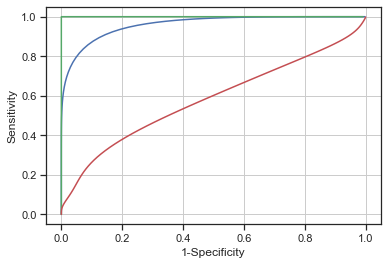

In [22]:
# Can petal length feature be used to distinguish versicolor (see the blue curve)
plotROC(iris[iris.species=='versicolor'].petal_length, iris[iris.species=='virginica'].petal_length, color='b')

# Can pedal length separate setosa from all other species (see the green curve)
plotROC(iris[iris.species=='setosa'].petal_length, iris[iris.species!='setosa'].petal_length, color='g')

# Is sepal width usefull in separating virginica from setosa (red curve)
plotROC(iris[iris.species=='virginica'].sepal_width, iris[iris.species!='virginica'].sepal_width, color='r')

plt.grid()
    